# Análisis armónico de sistemas lineales. Diagramas de Bode

Esta técnica de análisis de estabilidad es completamente diferente a la de los dos apartados anteriores. También se la conoce como análisis de frecuencia.

Se basa en que cuando se introduce una señal sinusoidal en un sistema lineal se obtiene, tras un periodo transitorio, una respuesta sinusoidal de la misma frecuencia pero de amplitud diferente y desfasada. El análisis armónico estudia el desfase y la razón de amplitudes entre la entrada y la salida. Para un sistema de control por retroalimentación la razón de amplitudes (RA) nunca debe ser mayor de 1 ya que entonces se amplificaría la señal y el sistema se volvería inestable al retroalimentar la salida. El estudio del desfase es importante ya que de
cierta manera se puede considerar que da los mismos problemas que un retraso.

Para un sistema de primer orden con una entrada sinusoidal la razón de amplitudes será:

$$\mathrm{RA} = \frac{K_p}{\sqrt{1 + \omega^2 \tau_p^2}}$$

como se puede deducir a partir de la ec. [\[ec:sinusoidal-1\]](#ec:sinusoidal-1){reference-type="ref"
reference="ec:sinusoidal-1"}.

Debido a la importancia de conocer RA se ha desarrollado una técnica matemática para determinarlo a partir de la función de transferencia sin necesidad de tener que obtener la respuesta del sistema en tiempo real.

Hay que sustituir $s$ por $\mathrm{i}\omega$, ya que se trata de un número complejo, para poder expresar la función de transferencia como un número complejo del tipo $x + \mathrm{i}y$:

$$G (\mathrm{i}\omega) = \frac{K_p}{\tau_p \mathrm{i}\omega + 1} = \frac{K_p}{1 +
   \tau_p^2 \omega^2} + \mathrm{i}\left( - \frac{K_p \tau_p \omega}{1 + w^2
   \tau_p^2} \right)$$
   
Para eliminar separar la parte real de la compleja---eliminar el número complejo $\mathrm{i}$ del denominador---ha sido necesario multiplicar y dividir por el conjugado del denominador.

```{figure} ./img/complejo.svg
---
name: complejo
figclass: margin-caption
---
Representación del número complejo $W$ en el plano complejo.
```

Cualquier número complejo $W$ puede ser expresado, además de la manera habitual $x + \mathrm{i}y$, como un módulo $r$ y un argumento $\varphi$:

$$\begin{align}
    W = x + \mathrm{i} y &= r (\cos \varphi + \mathrm{i}\sin \varphi) = r \mathrm{e}^{\mathrm{i}\varphi}\\
    |W| = r &= \sqrt{x^2 + y^2}\\
    \varphi &= \mathrm{atan} \left( \frac{y}{x} \right)
\end{align}$$

Por tanto, la función de transferencia se puede expresar en función de $r$ y $\varphi$ como:

$$G (\mathrm{i}\omega) = \frac{K_p}{\sqrt{1 + \omega^2 \tau_p^2}}
   \mathrm{e}^{\mathrm{i}\varphi}$$
   
donde $\frac{K_p}{\sqrt{1 + \omega^2 \tau_p^2}}$ es la razón de amplitudes y $\varphi$ es el desfase. De esta manera se logra obtener el desfase y la razón de amplitudes sin tener que obtener la respuesta en tiempo real para una entrada sinusoidal de amplitud $M$ y frecuencia angular $\omega$.

En general, sea un sistema de orden $n$ con la siguiente función de transferencia:

$$G (s) = \frac{Q (s)}{P (s)}$$ 

donde $Q (s)$ y $P (s)$ son polinomios de orden $m$ y $n$ respectivamente y $m < n$. Se puede demostrar que:

1.  La respuesta final, cuando $t \rightarrow \infty$, a una entrada sinusoidal de frecuencia angular $\omega$ es una sinusoidal de la misma frecuencia.

2.  La razón de amplitudes (RA) es el módulo de $G (\mathrm{i} \omega)$:

    $$\mathrm{RA} = |G (\mathrm{i}\omega)|$$
    
    La respuesta sinusoidal tendrá el siguiente desfase:
        
    $$\varphi = \arg (G (\mathrm{i}\omega))$$

A continuación se tratan con detalle algunos de los principales sistemas estudiados y se introducen los diagramas de Bode.

## Sistemas lineales de primer orden

Para un sistema de primer orden de ganancia *k* y constante de tiempo $\tau$: 

$$\begin{aligned}
 \frac{\mathrm{RA}}{k} &= \frac{1}{\sqrt{\tau^2 \omega^2 + 1}} \\
 \varphi &= \mathrm{atan} (- \tau \omega)
\end{aligned}$$

Una manera conveniente de representar la razón de amplitudes y el desfase son los *diagramas de Bode*. Estos diagramas consisten en representar la razón de amplitudes frente a la frecuencia angular utilizando escalas logarítmicas y el desfase en una escala lineal frente a la frecuencia angular en una escala logarítmica. Si se desea utilizar solo escalas lineales hay que representar $\log \mathrm{RA}$ y $\varphi$ frente al $\log \omega$. A veces se representa la razón de amplitudes como decibelios:

$$\mathrm{dB}= 20 \log \mathrm{RA}$$

A menudo se representa en los diagramas de Bode $\frac{\mathrm{RA}}{k}$ y $\tau \omega$ para obtener diagramas independientes del sistema.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de Bode para un sistema de primer orden. ABF es la asíntota de baja frecuencia y AAF es la asíntota de alta frecuencia.
```


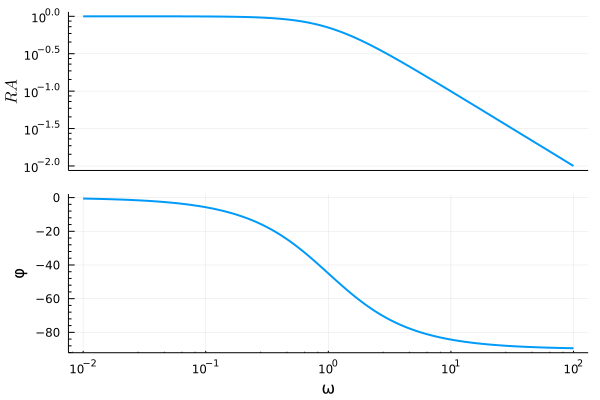

In [1]:
using SymPy, Plots, LaTeXStrings
#plotly()

w, z = symbols("omega zeta", real=true)
s = symbols("s")

G = 1/(s+1)

function RAphi(G)
    Gw = G.subs(s, sympy.I*w)

    RA = sqrt(sympy.re(Gw)^2 + sympy.im(Gw)^2)
    ϕ = sympy.arg(Gw)
    #ϕ = atan(sympy.im(Gw)/sympy.re(Gw))
    return RA, ϕ
end

function bodedata(RA, ϕ; wmin=1e-2, wmax=1e2, n=100)
    wdata = 10.0.^range(log10(wmin), log10(wmax), length=n)
    RAdata = [RA(i) for i in wdata]
    ϕdata = [N(ϕ(i)*180/pi) for i in wdata]
    return RAdata, ϕdata, wdata
end


function bode(G; wmin=1e-2, wmax=1e2, n=100)
    wdata = 10.0.^range(log10(wmin), log10(wmax), length=n)
    RAcol = zeros(n, length(G))
    phicol = zeros(n, length(G))
    i = 1
    for g in G
        ra, phi = RAphi(g)
        radata, phidata = bodedata(ra, phi, wmin=wmin, wmax=wmax, n=n)
        for j in 1:n
            RAcol[j,i] = radata[j]
            phicol[j,i] = phidata[j]
        end
        i += 1
    end
    
    RAplot = plot(wdata, RAcol, xscale=:log10, yscale=:log10, xticks=false,
                  ylabel=L"RA")
    ϕplot = plot(wdata, phicol, xscale=:log10,
                 xlabel="ω", ylabel="φ")
    plot(RAplot, ϕplot, layout = (2,1), lw= 2, legend=false, link=:x, minorticks=true)
end

bode(G)

Para dibujar el diagrama de Bode de un sistema lineal de primer orden, se debe calcular el logaritmo de la razón de amplitudes:

$$\log \left( \frac{\mathrm{RA}}{k} \right) = - \frac{1}{2} \log (1 + \tau^2
   \omega^2)$$
   
A partir del análisis de la figura [\[fig:bode_1\]](#fig:bode_1){reference-type="ref"
reference="fig:bode_1"} se observa que:

1.  La razón de amplitudes tiende a 1 cuando la frecuencia tiende a 0. Es decir:

    $$\lim_{\omega \to 0}  \frac{\mathrm{RA}}{k} = 1
         \Rightarrow \lim_{\omega \to 0}
          \log
         \frac{\mathrm{RA}}{k} = 0$$ 
         
    Existe para bajas frecuencias una asíntota horizontal que para por el punto (1,1) de la gráfica de razón de amplitudes frente a la frecuencia, es la asíntota de baja frecuencia (ABF).

2.  También existe una asíntota de alta frecuencia (AAF), $\log \frac{\mathrm{RA}}{k} \approx - \log \tau \omega$. Es una recta de pendiente -1 que pasa por el punto (1,1). Este es el punto en el que la diferencia entre el valor de la asíntota y el de la curva es máxima.

3.  A partir del estudio de la gráfica de desfase frente a frecuencia se observa que el desfase tiende a 0 cuando la frecuencia tiende a 0.

4.  Si la frecuencia tiende a $\infty$, el desfase tiende a -90º.

5.  Si el desfase es de -45º, $\log \tau \omega = 0$.

## Sistema lineal de segundo orden

Para un sistema lineal de 2 orden se puede demostrar que la razón de amplitudes y el desfase se expresan como:

$$\begin{aligned}
  \mathrm{RA} &= \frac{k}{\sqrt{(1 - \tau^2 \omega^2)^2 + (2 \zeta \tau
  \omega)^2}}\\
  \varphi &= \mathrm{atan} \left( - \frac{2 \zeta \tau \omega}{1 - \tau^2
  \omega^2} \right)
\end{aligned}$$

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagramas de Bode para diferentes sistemas de 2º orden en función del coeficiente de amortiguamiento.
```

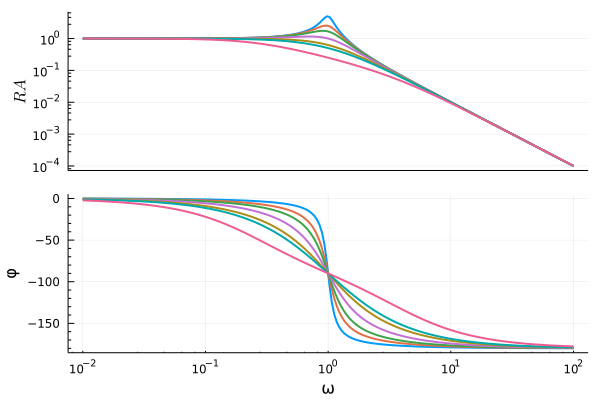

In [2]:
zetas = [0.1, 0.2, 0.3, 0.5, 0.8, 1, 2]

G = 1/(s^2 + 2*z*s +1)

GG = [G.subs(z, i) for i in zetas]

bode(GG, n=200)

En este caso, de nuevo aparece una asíntota de bajas frecuencias:

$$\lim_{\omega \to 0} \frac{\mathrm{RA}}{k} = 1$$

y una asíntota para altas frecuencias:

$$\lim_{\omega \to 0} \log \frac{\mathrm{RA}}{k} = - 2 \log \tau \omega$$

A partir del análisis de las gráficas de la figura anterior se observa que el desfase máximo posible es de -180º. Existe un máximo en la razón de amplitudes, si el sistema es subamortiguado, cuando $\omega \tau = 1$: 

$$\begin{aligned}
  \left( \frac{\mathrm{RA}}{k} \right)_{\max} &= \frac{1}{2 \zeta \sqrt[]{1 -
  \zeta^2}} \\
  \varphi_{\max} &= \sqrt{1 - 2 \zeta^2} 
\end{aligned}$$

## Retraso

En el caso del retraso la razón de amplitudes y el desfase son:

 $$\begin{aligned}
  & \mathrm{RA} = 1 & \\
  & \varphi = - t_d \omega & 
\end{aligned}$$

donde $t_d$ es el valor del retraso.

```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de Bode para el retraso.
```

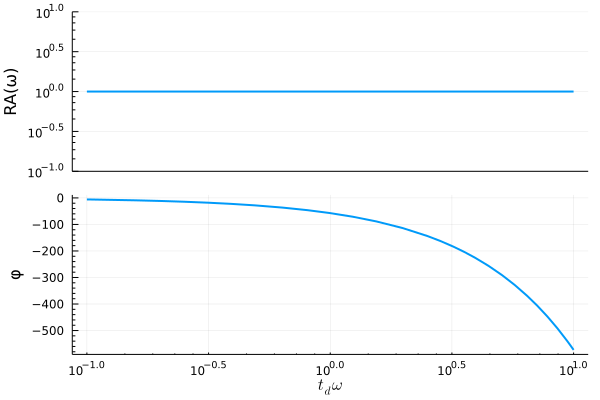

In [3]:
wmin = .1
wmax = 10.
RAplot = plot([wmin, wmax],[1.,1.], xscale=:log10, yscale=:log10, xticks=false,
                  ylabel="RA(ω)", ylim=(.1,10))
ϕplot = plot(-w*180/pi, wmin, wmax, xscale=:log10,
             xlabel=L"t_d \omega", ylabel="φ")
  plot(RAplot, ϕplot, layout = (2,1), lw= 2, legend=false, link=:x, minorticks=true)

## Controladores

A continuación se muestra para diferentes controladores las fórmulas utilizadas para la construcción de los diagramas de Bode.

### Controlador proporcional

Para un controlador proporcional la razón de amplitudes es:

$$\begin{aligned}
  \mathrm{RA} &= K_c \\
  \varphi &= 0 \end{aligned}$$

### Controlador proporcional+integral

Las ecuaciones necesarias para dibujar el diagrama de Bode de un controlador PI son

: $$\begin{aligned}
  \mathrm{RA} &= K_c  \sqrt[]{1 + \frac{1}{\omega^2 \tau_I^2}}\\
  \varphi &= \mathrm{atan} \left( - \frac{1}{\omega \tau_I} \right)\end{aligned}$$
  
```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de Bode para un controlador PI.
```

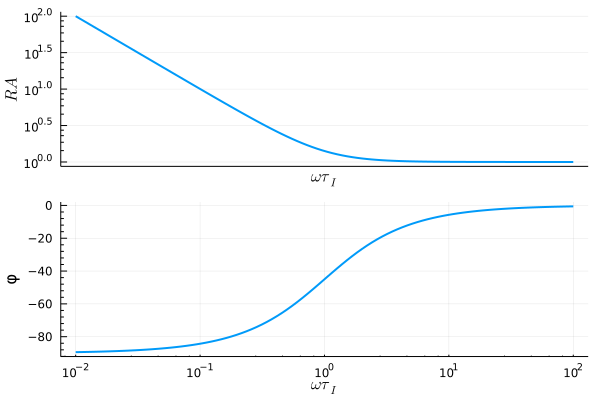

In [4]:
bode(1+1/s)
xlabel!(L"\omega \tau_I")

En este caso existe, de nuevo, una asíntota de baja frecuencia:

$$\omega \rightarrow 0 \Rightarrow \frac{1}{\omega^2 \tau_I^2} \gg 0
   \Rightarrow \log \left( \frac{\mathrm{RA}}{K_c} \right) \rightarrow - \log
   \omega \tau_I$$
   
y una asíntota de alta frecuencia:

$$\omega \rightarrow \infty \Rightarrow \frac{1}{\omega^2 \tau_I^2}
   \rightarrow 0 \Rightarrow \log \left( \frac{\mathrm{RA}}{K_c} \right)
   \rightarrow 0$$

### Controlador proporcional+derivativo

En el caso de utilizar un controlador PD:

$$\begin{aligned}
  \mathrm{RA} &= K_c  \sqrt[]{1 + \tau_D^2 w^2}\\
  \varphi &= \mathrm{atan} \tau_D \omega > 0 \end{aligned}$$
  
```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de Bode de un controlador PD.
```

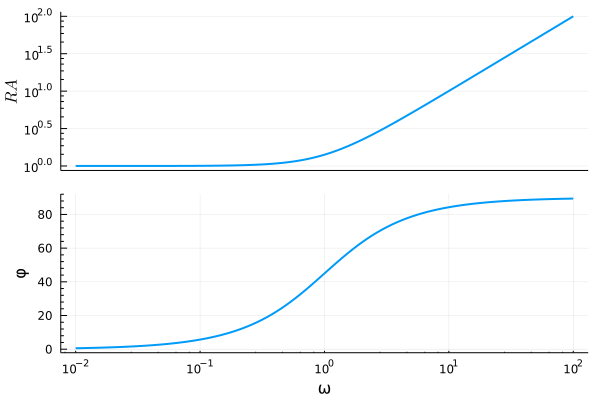

In [5]:
bode(1+s)

En este caso el desfase aparece adelantado a la entrada. De nuevo se comprueba que la acción derivativa se adelanta al comportamiento futuro de las perturbaciones.

### Controlador proporcional+integral+derivativo

Para un controlador PID:

 $$\begin{aligned}
  \mathrm{RA} &= K_c  \sqrt[]{\left( \tau_D \omega - \frac{1}{\tau_I \omega}
  \right)^2 + 1} \\
  \varphi &= \mathrm{atan} \left( \tau_D \omega - \frac{1}{\tau_I \omega}
  \right) \end{aligned}$$
  
```{figure} ./img/0.png
---
figclass: margin
align: left
---
Diagrama de Bode para un controlador PID con $\tau_I=10$ y $\tau_D=0.1$.
```

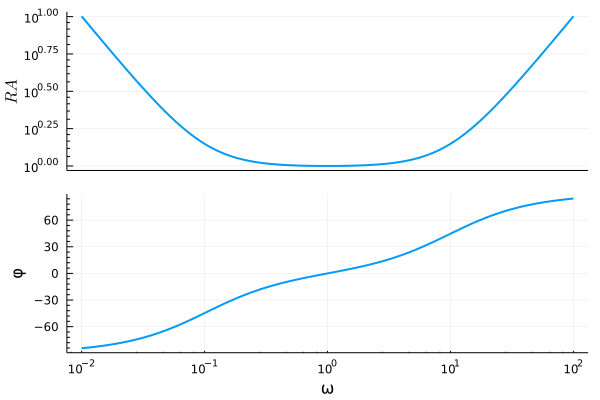

In [6]:
bode(1+1/10s+0.1s)

## Sistemas de varios componentes

Sea un sistema de *n* procesos en serie cuya dinámica venga descrita por las funciones de transferencia $G_1, G_2, \ldots, G_n$. Su dinámica global vendrá descrita por la siguiente función de transferencia:

$$G (s) = G_1 (s) G_2 (s) \ldots G_n (s)$$

Se puede demostrar que la razón de amplitudes y el desfase global son:

$$\begin{aligned}
  & \mathrm{RA} = \mathrm{RA}_1 \mathrm{RA}_2 \ldots \mathrm{RA}_n = \prod_i
  \mathrm{RA}_i & \\
  & \varphi = \varphi_1 + \varphi_2 + \ldots + \varphi_n = \sum_i \varphi_i &
  \end{aligned}$$

Por tanto,

$$\log \mathrm{RA} = \log \mathrm{RA}_1 + \log \mathrm{RA}_2 + \ldots + \log
   \mathrm{RA}_n = \sum_i \log \mathrm{RA}_i$$